# Python SCAD

In [ ]:
pip install solid

In [ ]:
import os
from solid import *
from PIL import Image


def assembly(annotation=""):

    a = import_stl("base.stl") + translate([5, -37, 10])(
    linear_extrude(height=2, convexity=4)(
    text(annotation,
         size=8,
         font="helvetica",
         halign="center",
         valign="center")))

    return a


if __name__ == '__main__':
    a = assembly("Hello World!")

    outfile = "export.scad"
    stlfile = "export.stl"
    outimage = "export.png"

    scad_render_to_file(a, outfile)

    os.system("openscad {} -o {}".format(outfile, stlfile))

    os.system("openscad --preview --imgsize=512,512 {} -o {}".format(outfile, outimage))
    picture = Image.open(outimage).show()

# Numpy-STL

In [ ]:
pip install numpy-stl

### Quickstart

In [1]:
import numpy
from stl import mesh

# Using an existing stl file:
#your_mesh = mesh.Mesh.from_file('some_file.stl')

# Or creating a new mesh (make sure not to overwrite the `mesh` import by
# naming it `mesh`):
VERTICE_COUNT = 100
data = numpy.zeros(VERTICE_COUNT, dtype=mesh.Mesh.dtype)
your_mesh = mesh.Mesh(data, remove_empty_areas=False)

# The mesh normals (calculated automatically)
your_mesh.normals
# The mesh vectors
your_mesh.v0, your_mesh.v1, your_mesh.v2
# Accessing individual points (concatenation of v0, v1 and v2 in triplets)
assert (your_mesh.points[0][0:3] == your_mesh.v0[0]).all()
assert (your_mesh.points[0][3:6] == your_mesh.v1[0]).all()
assert (your_mesh.points[0][6:9] == your_mesh.v2[0]).all()
assert (your_mesh.points[1][0:3] == your_mesh.v0[1]).all()

your_mesh.save('new_stl_file.stl')

### Plotting using matplotlib:

ValueError: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead

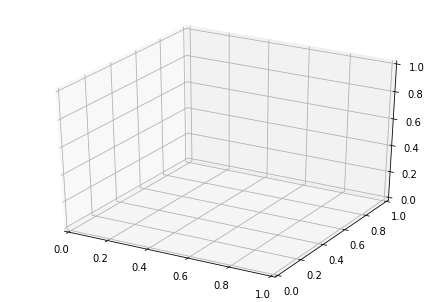

In [7]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
#your_mesh = mesh.Mesh.from_file('tests/stl_binary/HalfDonut.stl')
your_mesh = mesh.Mesh.from_file('new_stl_file.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten(-1)
#scale = your_mesh.points.flatten('F')
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

### Modify Mesh objects

ValueError: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead

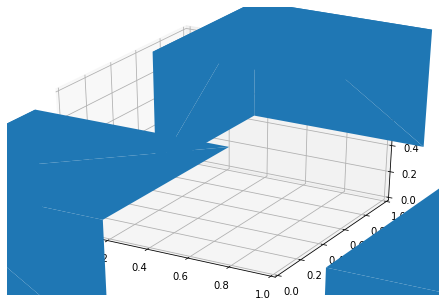

In [3]:
from stl import mesh
import math
import numpy

# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Front face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])

# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

# Generate 4 different meshes so we can rotate them later
meshes = [mesh.Mesh(data.copy()) for _ in range(4)]

# Rotate 90 degrees over the Y axis
meshes[0].rotate([0.0, 0.5, 0.0], math.radians(90))

# Translate 2 points over the X axis
meshes[1].x += 2

# Rotate 90 degrees over the X axis
meshes[2].rotate([0.5, 0.0, 0.0], math.radians(90))
# Translate 2 points over the X and Y points
meshes[2].x += 2
meshes[2].y += 2

# Rotate 90 degrees over the X and Y axis
meshes[3].rotate([0.5, 0.0, 0.0], math.radians(90))
meshes[3].rotate([0.0, 0.5, 0.0], math.radians(90))
# Translate 2 points over the Y axis
meshes[3].y += 2


# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube faces
for m in meshes:
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate([m.points for m in meshes]).flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()